In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from matplotlib import rcParams as rcP
%matplotlib inline

In [5]:
df=pd.read_csv(r'D:\Machine learning\Pune House Price Prediction\Pune_House_Data.csv')
df.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road


In [6]:
df.shape

(13320, 9)

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  object 
 1   availability   13320 non-null  object 
 2   size           13304 non-null  object 
 3   society        7818 non-null   object 
 4   total_sqft     13320 non-null  object 
 5   bath           13247 non-null  float64
 6   balcony        12711 non-null  float64
 7   price          13320 non-null  float64
 8   site_location  13319 non-null  object 
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [9]:
df.isnull().sum()

area_type           0
availability        0
size               16
society          5502
total_sqft          0
bath               73
balcony           609
price               0
site_location       1
dtype: int64

In [10]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [11]:
df.groupby('availability')['availability'].agg('count')

availability
14-Jul                      1
14-Nov                      1
15-Aug                      1
15-Dec                      1
15-Jun                      1
                        ...  
22-Mar                      3
22-May                     10
22-Nov                      2
Immediate Possession       16
Ready To Move           10581
Name: availability, Length: 81, dtype: int64

In [12]:
df.groupby('size')['size'].agg('count')

size
1 BHK          538
1 Bedroom      105
1 RK            13
10 BHK           2
10 Bedroom      12
11 BHK           2
11 Bedroom       2
12 Bedroom       1
13 BHK           1
14 BHK           1
16 BHK           1
18 Bedroom       1
19 BHK           1
2 BHK         5199
2 Bedroom      329
27 BHK           1
3 BHK         4310
3 Bedroom      547
4 BHK          591
4 Bedroom      826
43 Bedroom       1
5 BHK           59
5 Bedroom      297
6 BHK           30
6 Bedroom      191
7 BHK           17
7 Bedroom       83
8 BHK            5
8 Bedroom       84
9 BHK            8
9 Bedroom       46
Name: size, dtype: int64

In [13]:
df.groupby('site_location')['site_location'].agg('count')

site_location
Alandi Road        139
Ambegaon Budruk    139
Anandnagar         139
Aundh              139
Aundh Road         139
                  ... 
Wakadewadi         138
Wanowrie           138
Warje              138
Yerawada           138
other                1
Name: site_location, Length: 97, dtype: int64

In [14]:
df=df.drop('society',axis='columns')
df.head()

,area_type,availability,size,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,1200,2.0,1.0,51.00,Aundh Road


In [15]:
df.isnull().sum()

area_type          0
availability       0
size              16
total_sqft         0
bath              73
balcony          609
price              0
site_location      1
dtype: int64

In [16]:
from math import floor
balcony_median=float(floor(df.balcony.median()))
bath_median=float(floor(df.bath.median()))

df.balcony=df.balcony.fillna(balcony_median)
df.bath=df.bath.fillna(bath_median)

In [17]:
df.isnull().sum()

area_type         0
availability      0
size             16
total_sqft        0
bath              0
balcony           0
price             0
site_location     1
dtype: int64

In [18]:
df=df.dropna()
df.isnull().sum()

area_type        0
availability     0
size             0
total_sqft       0
bath             0
balcony          0
price            0
site_location    0
dtype: int64

In [19]:
df['bhk']=df['size'].apply(lambda x:int(x.split(' ')[0]))
df=df.drop('size',axis='columns')
df.groupby('bhk')['bhk'].agg('count')

bhk
1      656
2     5527
3     4857
4     1417
5      356
6      221
7      100
8       89
9       54
10      14
11       4
12       1
13       1
14       1
16       1
18       1
19       1
27       1
43       1
Name: bhk, dtype: int64

In [20]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [21]:
def isFloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [22]:
df[~df['total_sqft'].apply(isFloat)]

,area_type,availability,total_sqft,bath,balcony,price,site_location,bhk
30,Super built-up Area,19-Dec,2100 - 2850,4.0,0.0,186.000,Gultekdi,4
56,Built-up Area,20-Feb,3010 - 3410,2.0,2.0,192.000,Model colony,4
81,Built-up Area,18-Oct,2957 - 3450,2.0,2.0,224.500,Shukrawar Peth,4
122,Super built-up Area,18-Mar,3067 - 8156,4.0,0.0,477.000,Ganeshkhind,4
137,Super built-up Area,19-Mar,1042 - 1105,2.0,0.0,54.005,Khadaki,2
...,...,...,...,...,...,...,...,...
12990,Super built-up Area,18-May,1804 - 2273,3.0,0.0,122.000,Gokhale Nagar,3
13059,Super built-up Area,Ready To Move,1200 - 1470,2.0,0.0,72.760,Anandnagar,2
13240,Super built-up Area,Ready To Move,1020 - 1130,2.0,2.0,52.570,Vadgaon Budruk,1
13265,Super built-up Area,20-Sep,1133 - 1384,2.0,0.0,59.135,Dapodi,2


In [23]:

def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [24]:
df['new_total_sqft']=df.total_sqft.apply(convert_sqft_to_num)
df=df.drop('total_sqft',axis='columns')
df.head()

,area_type,availability,bath,balcony,price,site_location,bhk,new_total_sqft
0,Super built-up Area,19-Dec,2.0,1.0,39.07,Alandi Road,2,1056.0
1,Plot Area,Ready To Move,5.0,3.0,120.00,Ambegaon Budruk,4,2600.0
2,Built-up Area,Ready To Move,2.0,3.0,62.00,Anandnagar,3,1440.0
3,Super built-up Area,Ready To Move,3.0,1.0,95.00,Aundh,3,1521.0
4,Super built-up Area,Ready To Move,2.0,1.0,51.00,Aundh Road,2,1200.0


In [25]:
df.isna().sum()

area_type          0
availability       0
bath               0
balcony            0
price              0
site_location      0
bhk                0
new_total_sqft    46
dtype: int64

In [26]:
df=df.dropna()
df.isna().sum()

area_type         0
availability      0
bath              0
balcony           0
price             0
site_location     0
bhk               0
new_total_sqft    0
dtype: int64

In [27]:
#adding a new column of price_per_sqft
df1=df.copy()

#in our dataset the price column is in lakhs
df1['price_per_sqft']=(df1['price']*10000)/df1['new_total_sqft']
df1.head()

,area_type,availability,bath,balcony,price,site_location,bhk,new_total_sqft,price_per_sqft
0,Super built-up Area,19-Dec,2.0,1.0,39.07,Alandi Road,2,1056.0,369.981061
1,Plot Area,Ready To Move,5.0,3.0,120.00,Ambegaon Budruk,4,2600.0,461.538462
2,Built-up Area,Ready To Move,2.0,3.0,62.00,Anandnagar,3,1440.0,430.555556
3,Super built-up Area,Ready To Move,3.0,1.0,95.00,Aundh,3,1521.0,624.589086
4,Super built-up Area,Ready To Move,2.0,1.0,51.00,Aundh Road,2,1200.0,425.000000


In [28]:
#checking unique values of 'location' column
locations=list(df['site_location'].unique())
print(len(locations))

97


In [29]:
#removing the extra spaces at the end
df1.site_location=df1.site_location.apply(lambda x:x.strip())

#calculating all the unique values in 'site_location' column
location_stats=df1.groupby('site_location')['site_location'].agg('count').sort_values(ascending=False)
location_stats

site_location
Ambegaon Budruk    139
Chandan Nagar      139
Anandnagar         139
Aundh Road         139
Baner              139
                  ... 
Nagar Road         136
Shivaji Nagar      136
Wakadewadi         136
Warje              136
other                1
Name: site_location, Length: 97, dtype: int64

In [30]:
#checking locations with less than 10 values
print(len(location_stats[location_stats<=10]),len(df1.site_location.unique()))

1 97


In [31]:
df1.head()

,area_type,availability,bath,balcony,price,site_location,bhk,new_total_sqft,price_per_sqft
0,Super built-up Area,19-Dec,2.0,1.0,39.07,Alandi Road,2,1056.0,369.981061
1,Plot Area,Ready To Move,5.0,3.0,120.00,Ambegaon Budruk,4,2600.0,461.538462
2,Built-up Area,Ready To Move,2.0,3.0,62.00,Anandnagar,3,1440.0,430.555556
3,Super built-up Area,Ready To Move,3.0,1.0,95.00,Aundh,3,1521.0,624.589086
4,Super built-up Area,Ready To Move,2.0,1.0,51.00,Aundh Road,2,1200.0,425.000000


In [32]:
#labelling the locations with less than or equal to 10 occcurences to 'other'
locations_less_than_10=location_stats[location_stats<=10]
df1.site_location=df1.site_location.apply(lambda x:'other' if x in locations_less_than_10 else x)
len(df1.site_location.unique())

97

In [33]:
#checking the unique values in 'availability column'
df1.groupby('availability')['availability'].agg('count').sort_values(ascending=False)

availability
Ready To Move    10541
18-Dec             306
18-May             294
18-Apr             271
18-Aug             199
                 ...  
16-Nov               1
15-Dec               1
15-Aug               1
14-Nov               1
17-Jan               1
Name: availability, Length: 80, dtype: int64

In [34]:
#labelling the dates into Not ready
dates=df1.groupby('availability')['availability'].agg('count').sort_values(ascending=False)
dates_not_ready=dates[dates<10000]
df1.availability=df1.availability.apply(lambda x:'Not Ready' if x in dates_not_ready else x)
len(df1.availability.unique())

2

In [35]:
df.head()

,area_type,availability,bath,balcony,price,site_location,bhk,new_total_sqft
0,Super built-up Area,19-Dec,2.0,1.0,39.07,Alandi Road,2,1056.0
1,Plot Area,Ready To Move,5.0,3.0,120.00,Ambegaon Budruk,4,2600.0
2,Built-up Area,Ready To Move,2.0,3.0,62.00,Anandnagar,3,1440.0
3,Super built-up Area,Ready To Move,3.0,1.0,95.00,Aundh,3,1521.0
4,Super built-up Area,Ready To Move,2.0,1.0,51.00,Aundh Road,2,1200.0


In [36]:
df1.groupby('area_type')['area_type'].agg('count').sort_values(ascending=False)

area_type
Super built-up  Area    8778
Built-up  Area          2402
Plot  Area              1991
Carpet  Area              86
Name: area_type, dtype: int64

In [37]:
df2=df1[~(df1.new_total_sqft/df1.bhk<300)]
print(len(df2),len(df1))

12513 13257


In [38]:
df2.price_per_sqft.describe()

count    12513.000000
mean       630.756717
std        416.087978
min         26.782981
25%        421.146953
50%        529.513889
75%        691.666667
max      17647.058824
Name: price_per_sqft, dtype: float64

In [39]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,sub_df in df.groupby('site_location'):
        m=np.mean(sub_df.price_per_sqft)
        sd=np.std(sub_df.price_per_sqft)
        reduce_df=sub_df[(sub_df.price_per_sqft>(m-sd))&(sub_df.price_per_sqft<(m+sd))]
        df_out=pd.concat([df_out,reduce_df],ignore_index=True)
    return df_out
df3=remove_pps_outliers(df2)
print(len(df2),len(df3))

12513 10937


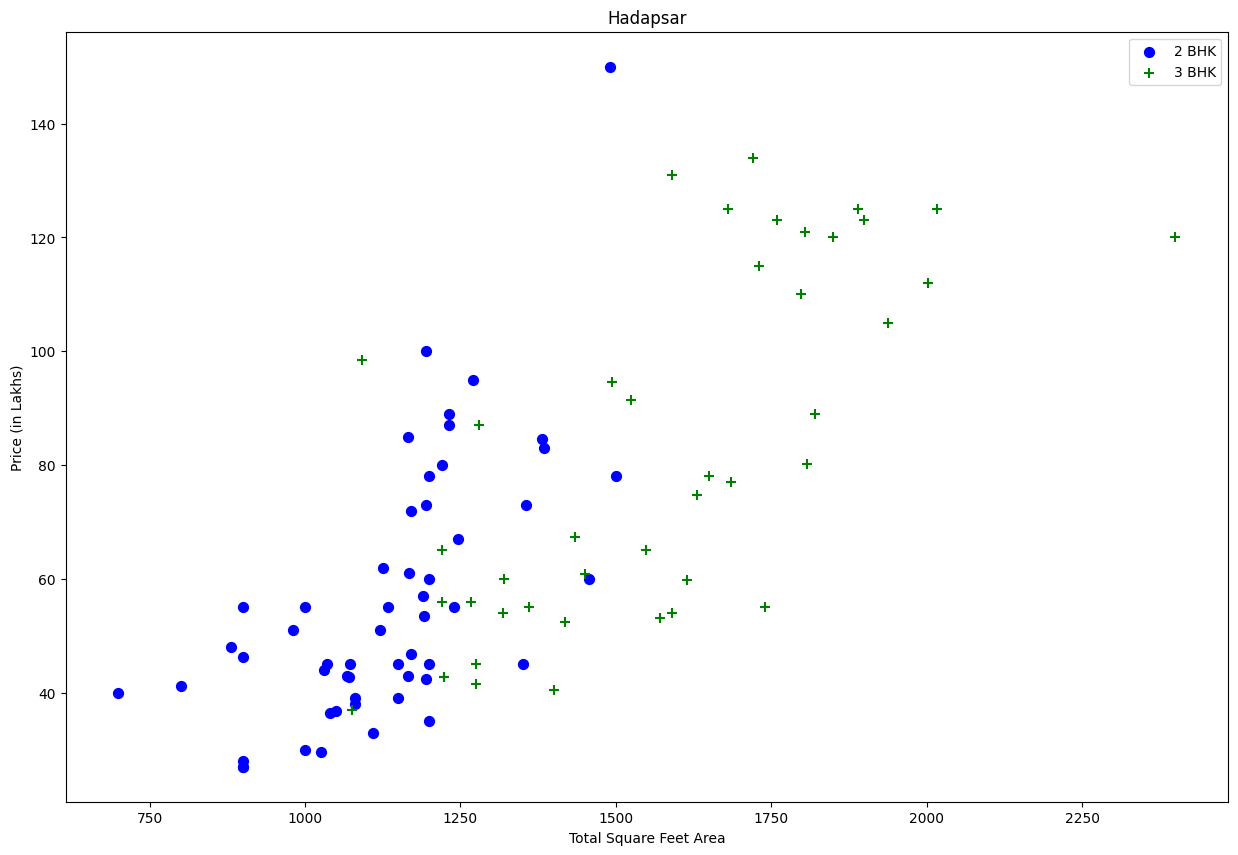

In [40]:
def plot_scatter_chart(df, site_location):
    bhk2 = df[(df.site_location == site_location) & (df.bhk == 2)]
    bhk3 = df[(df.site_location == site_location) & (df.bhk == 3)]
    rcP['figure.figsize'] = (15,10)
    plt.scatter(bhk2.new_total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.new_total_sqft, bhk3.price, color='green', marker='+', label='3 BHK', s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price (in Lakhs)')
    plt.title(site_location)
    plt.legend()

plot_scatter_chart(df3, 'Hadapsar')

In [41]:
# Here we observe that 3 BHK cost that same as 2 BHK in 'Hebbal' location hence removing such outliers is necessary
def remove_bhk_outliers(df):
    exclude_indices = np.array([])

    for site_location, site_location_df in df.groupby('site_location'):
        bhk_stats = {}

        for bhk, bhk_df in site_location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }

        for bhk, bhk_df in site_location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)

    return df.drop(exclude_indices, axis='index')

df4 = remove_bhk_outliers(df3)
print(len(df3), len(df4))

10937 7459


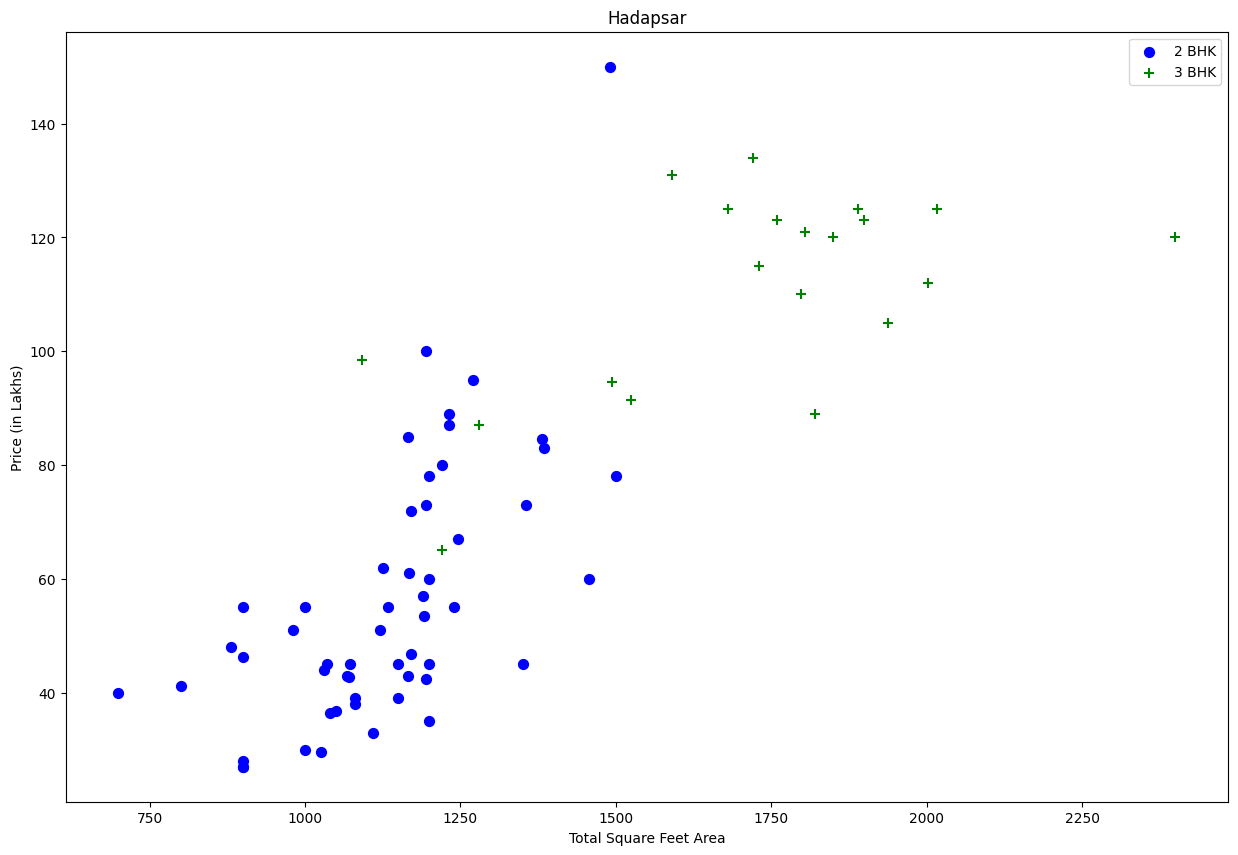

In [42]:
plot_scatter_chart(df4, 'Hadapsar')

Text(0, 0.5, 'Count')

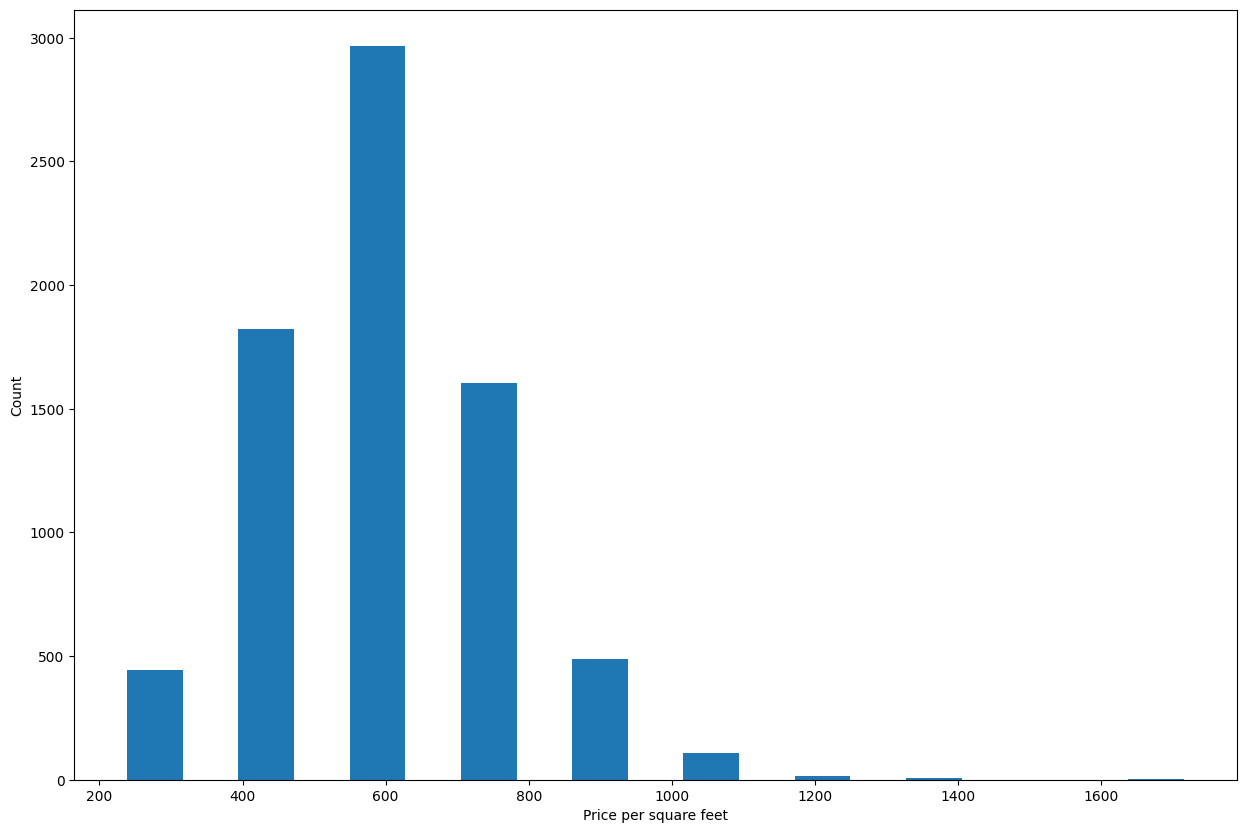

In [43]:
plt.hist(df4.price_per_sqft,rwidth=0.5)
plt.xlabel('Price per square feet')
plt.ylabel('Count')

C:\Users\neha0\AppData\Local\Temp\ipykernel_18372\3165035094.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='area_type', y='price', palette='Set2')


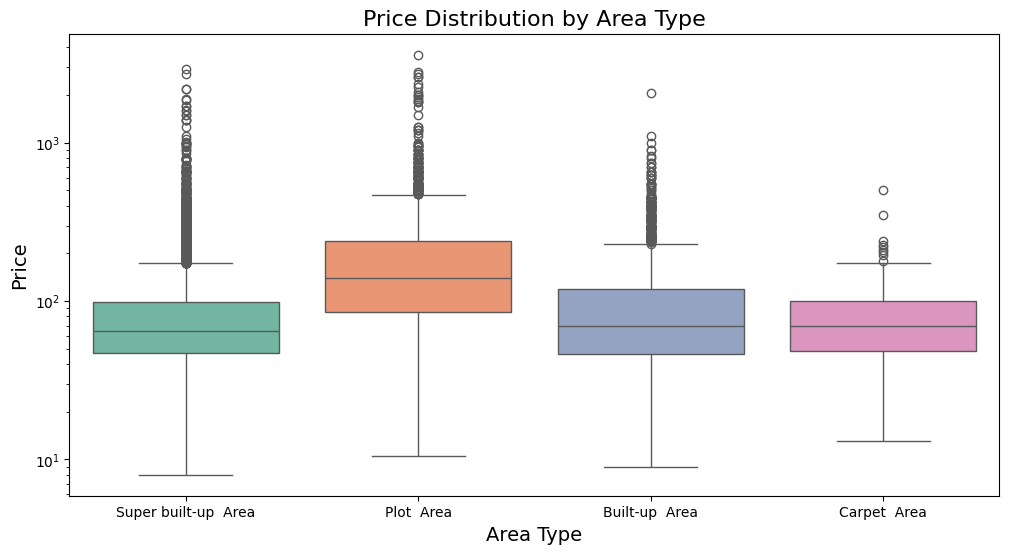

In [44]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='area_type', y='price', palette='Set2')
plt.title('Price Distribution by Area Type', fontsize=16)
plt.xlabel('Area Type', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.yscale('log')  # Log scale for better visualization of outliers
plt.show()

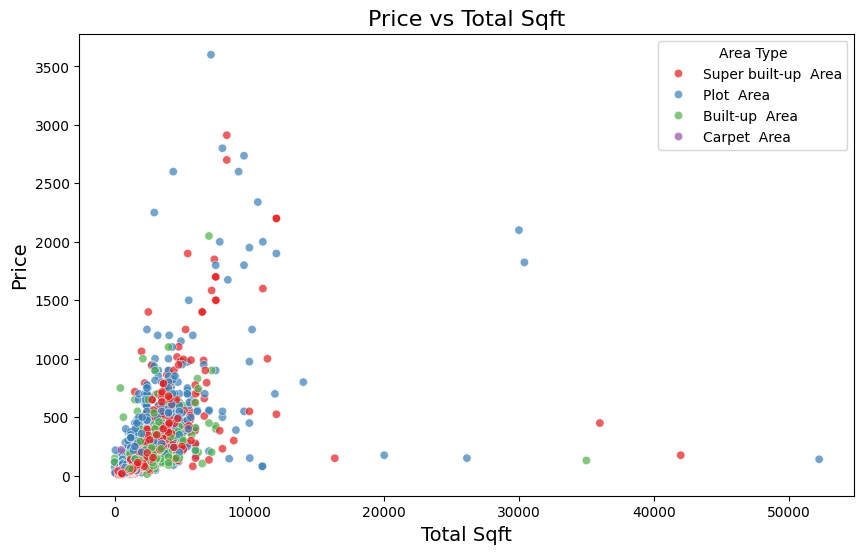

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='new_total_sqft', y='price', hue='area_type', palette='Set1', alpha=0.7)
plt.title('Price vs Total Sqft', fontsize=16)
plt.xlabel('Total Sqft', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend(title='Area Type')
plt.show()

C:\Users\neha0\AppData\Local\Temp\ipykernel_18372\3728571743.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bhk_counts.index, y=bhk_counts.values, palette='cool')


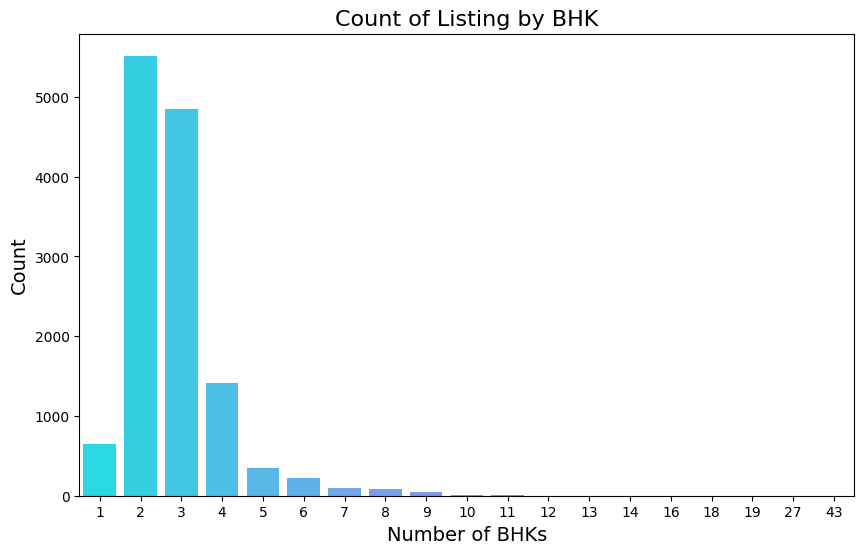

In [46]:
plt.figure(figsize=(10, 6))
bhk_counts = df['bhk'].value_counts().sort_index()
sns.barplot(x=bhk_counts.index, y=bhk_counts.values, palette='cool')
plt.title('Count of Listing by BHK', fontsize=16)
plt.xlabel('Number of BHKs', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

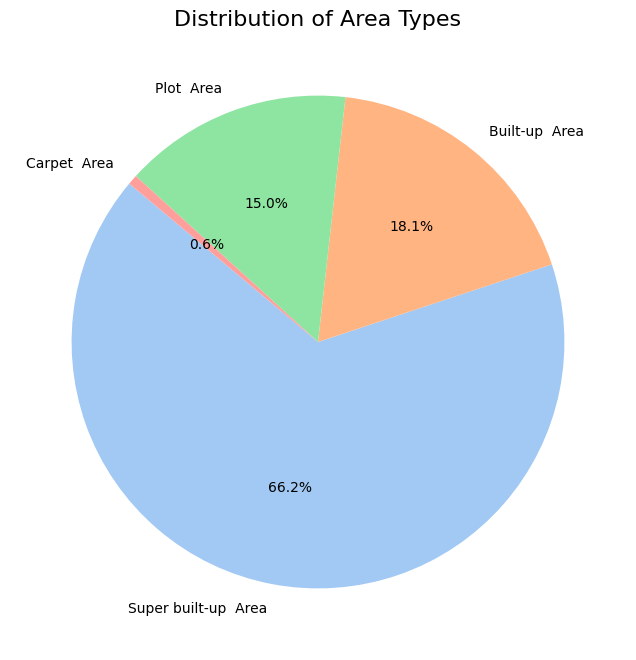

In [47]:
plt.figure(figsize=(8, 8))
area_type_counts = df['area_type'].value_counts()
plt.pie(area_type_counts, labels=area_type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Area Types', fontsize=16)
plt.show()

Text(0, 0.5, 'Count')

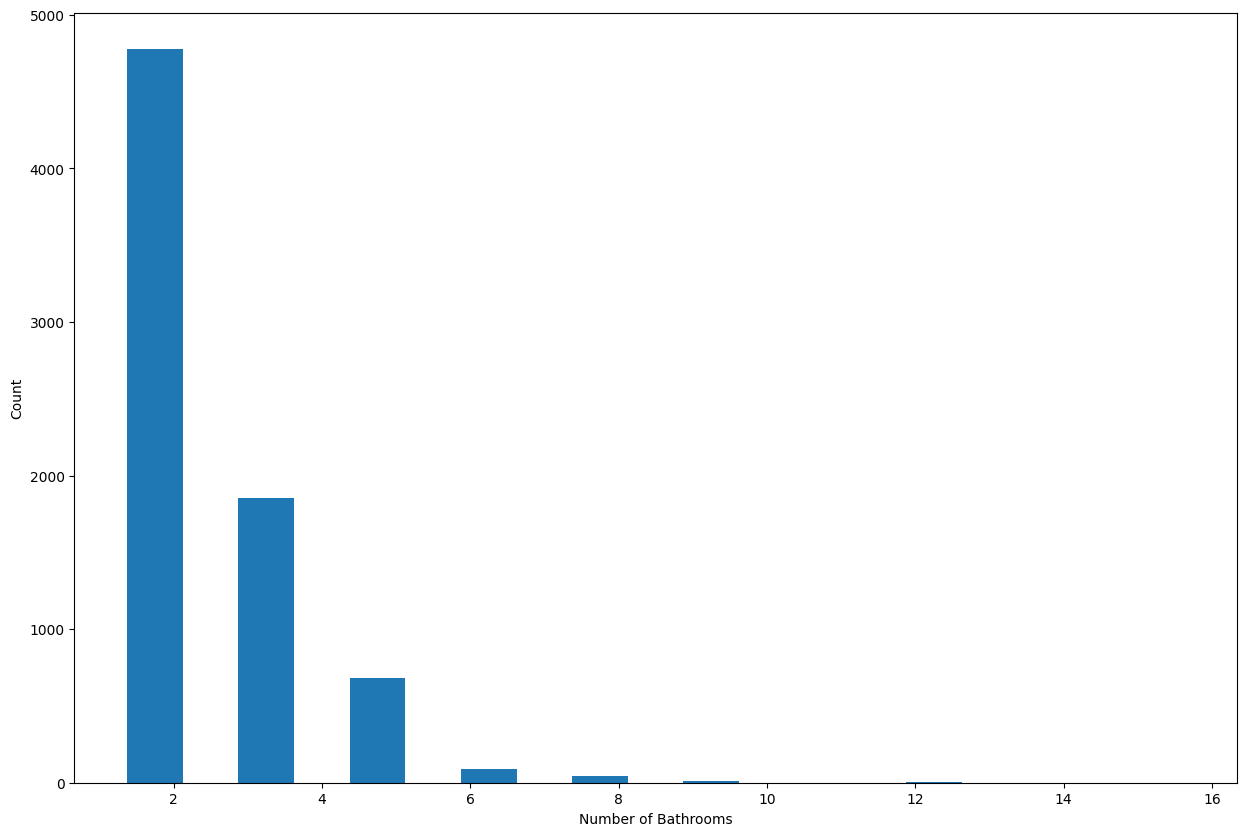

In [48]:
plt.hist(df4.bath, rwidth=0.5)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')

In [49]:
df5=df4[df4.bath<(df4.bhk+2)]
print(len(df4),len(df5))

7459 7395


In [50]:
df5.tail()

,area_type,availability,bath,balcony,price,site_location,bhk,new_total_sqft,price_per_sqft
10923,Super built-up Area,Not Ready,2.0,1.0,67.0,Yerawada,2,1165.0,575.107296
10928,Built-up Area,Ready To Move,6.0,2.0,115.0,Yerawada,6,3500.0,328.571429
10931,Built-up Area,Not Ready,2.0,2.0,353.0,Yerawada,5,3210.0,1099.688474
10932,Super built-up Area,Ready To Move,2.0,2.0,54.0,Yerawada,2,1050.0,514.285714
10936,Super built-up Area,Not Ready,2.0,1.0,70.0,Yerawada,2,1132.0,618.374558


In [51]:
df6=df5.copy()
df6=df6.drop('price_per_sqft',axis='columns')

In [52]:
df6.head()

,area_type,availability,bath,balcony,price,site_location,bhk,new_total_sqft
0,Super built-up Area,Not Ready,2.0,1.0,39.07,Alandi Road,2,1056.0
1,Plot Area,Ready To Move,4.0,1.0,245.00,Alandi Road,4,2894.0
2,Super built-up Area,Ready To Move,2.0,2.0,50.00,Alandi Road,2,1084.0
3,Super built-up Area,Ready To Move,2.0,2.0,80.00,Alandi Road,2,1230.0
4,Super built-up Area,Ready To Move,3.0,2.0,130.00,Alandi Road,3,1750.0


In [53]:
# Converting the categorical_value into numerical_values using get_dummies method
dummy_cols = pd.get_dummies(df6.site_location)
df6 = pd.concat([df6,dummy_cols], axis='columns')

In [54]:
# Converting the categorical_value into numerical_values using get_dummies method
dummy_cols = pd.get_dummies(df6.availability).drop('Not Ready', axis='columns')
df6 = pd.concat([df6,dummy_cols], axis='columns')

In [55]:
# Converting the categorical_value into numerical_values using get_dummies method
dummy_cols = pd.get_dummies(df6.area_type).drop('Super built-up  Area', axis='columns')
df6 = pd.concat([df6,dummy_cols], axis='columns')

In [56]:
df6.drop(['area_type','availability','site_location'],axis='columns',inplace=True)
df.head(10)

,area_type,availability,bath,balcony,price,site_location,bhk,new_total_sqft
0,Super built-up Area,19-Dec,2.0,1.0,39.07,Alandi Road,2,1056.0
1,Plot Area,Ready To Move,5.0,3.0,120.00,Ambegaon Budruk,4,2600.0
2,Built-up Area,Ready To Move,2.0,3.0,62.00,Anandnagar,3,1440.0
3,Super built-up Area,Ready To Move,3.0,1.0,95.00,Aundh,3,1521.0
4,Super built-up Area,Ready To Move,2.0,1.0,51.00,Aundh Road,2,1200.0
5,Super built-up Area,Ready To Move,2.0,1.0,38.00,Balaji Nagar,2,1170.0
6,Super built-up Area,18-May,4.0,2.0,204.00,Baner,4,2732.0
7,Super built-up Area,Ready To Move,4.0,2.0,600.00,Baner road,4,3300.0
8,Super built-up Area,Ready To Move,3.0,1.0,63.25,Bhandarkar Road,3,1310.0
9,Plot Area,Ready To Move,6.0,2.0,370.00,Bhavani Peth,6,1020.0


In [57]:
df6.shape

(7395, 105)

In [58]:
X = df6.drop('price', axis='columns')
y = df6['price']

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [60]:
# Creating a function for GridSearchCV

from sklearn.model_selection import GridSearchCV # Import GridSearchCV

def find_best_model(X, y):
    models = {
        'linear_regression': {
            'model': LinearRegression(),
            'parameters': {

            }
        },

        'lasso': {
            'model': Lasso(),
            'parameters': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },

        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'parameters': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv_X_y = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)

    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv=cv_X_y, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'accuracy': gs.best_score_
        })

    return pd.DataFrame(scores, columns=['model', 'best_parameters', 'accuracy'])

find_best_model(X, y)

c:\Users\neha0\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\neha0\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\neha0\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\neha0\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py

,model,best_parameters,accuracy
0,linear_regression,{},0.835449
1,lasso,"{'alpha': 2, 'selection': 'random'}",0.829250
2,decision_tree,"{'criterion': 'friedman_mse', 'splitter': 'best'}",0.777744


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)

In [62]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [63]:
model.score(X_test, y_test)

0.8180571987758953

In [64]:
X.columns

Index(['bath', 'balcony', 'bhk', 'new_total_sqft', 'Alandi Road',
       'Ambegaon Budruk', 'Anandnagar', 'Aundh', 'Aundh Road', 'Balaji Nagar',
       ...
       'Wadgaon Sheri', 'Wagholi', 'Wakadewadi', 'Wanowrie', 'Warje',
       'Yerawada', 'Ready To Move', 'Built-up  Area', 'Carpet  Area',
       'Plot  Area'],
      dtype='object', length=104)

In [65]:
np.where(X.columns=='Balaji Nagar')[0][0]

np.int64(9)

In [66]:
np.where(X.columns=='Built-up  Area')[0][0]

np.int64(101)

In [67]:
np.where(X.columns=='Ready To Move')[0][0]

np.int64(100)

In [70]:
# Creating a fuction to predict values
def prediction(location, bhk, bath, balcony, new_total_sqft, area_type, availability):

    loc_index, area_index, avail_index = -1,-1,-1

    if location!='other':
        loc_index = int(np.where(X.columns==location)[0][0])

    if area_type!='Super built-up  Area':
        area_index = np.where(X.columns==area_type)[0][0]

    if availability!='Not Ready':
        avail_index = np.where(X.columns==availability)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = bath
    x[1] = balcony
    x[2] = bhk
    x[3] = new_total_sqft

    if loc_index >= 0:
        x[loc_index] = 1
    if area_index >= 0:
        x[area_index] = 1
    if avail_index >= 0:
        x[avail_index] = 1

    return model.predict([x])[0]

In [71]:
prediction('Balaji Nagar', 2, 2, 2, 1000, 'Built-up  Area', 'Ready To Move')

c:\Users\neha0\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(52.170491240406335)

In [72]:
prediction('Hadapsar', 2, 2, 2, 1000, 'Super built-up  Area', 'Ready To Move')

c:\Users\neha0\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(52.09543340932167)

In [73]:
prediction('Camp', 2, 3, 2, 2000, 'Plot  Area', 'Not Ready')

c:\Users\neha0\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(140.18213495419303)

In [74]:
prediction('Baner', 2, 3, 2, 2000, 'Plot  Area', 'Not Ready')

c:\Users\neha0\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(140.23864441106957)

In [75]:
# Assuming X.columns is a list of all column names in your dataset
locations_list = [col.capitalize() for col in ['aundh', 'baner', 'kothrud', 'wakad', 'hinjewadi', 'pimple_saudagar']]  # Replace with your actual locations
area_types_list = [col.capitalize() for col in ['built_up_area', 'carpet_area', 'plot_area', 'super_built_up_area']]
availability_list = [col.capitalize() for col in ['ready_to_move', 'under_construction', 'not_ready']]

# Generate the dictionary for columns.pkl
data_columns = {
    'data_columns': X.columns.tolist(),  # List of all column names from your model
    'locations': locations_list,         # Dynamically extracted or manually defined
    'area_types': area_types_list,
    'availabilities': availability_list
}

import pickle
# Save to pickle
with open("columns.pkl", "wb") as f:
    pickle.dump(data_columns, f)

print("columns.pkl file has been created successfully.")
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

print("model.pkl file has been created successfully.")


columns.pkl file has been created successfully.
model.pkl file has been created successfully.


In [76]:
import pickle
import numpy as np

# Load the model and columns info
with open("model.pkl", "rb") as f:
    model = pickle.load(f)

with open("columns.pkl", "rb") as f:
    data_columns = pickle.load(f)

def predict_price(location, area_type, availability, new_total_sqft, bath, bhk):
    """
    Predicts house price based on input features.

    Args:
        location (str): e.g., 'Aundh'
        area_type (str): e.g., 'Built_up_area'
        availability (str): e.g., 'Ready_to_move'
        sqft (float): e.g., 1200
        bath (int): Number of bathrooms
        bhk (int): Number of bedrooms

    Returns:
        float: Predicted price
    """
    # Initialize feature vector with zeros
    x = np.zeros(len(data_columns['data_columns']))

    # Get the indices for one-hot features
    try:
        loc_index = data_columns['data_columns'].index(f"location_{location}")
    except ValueError:
        loc_index = -1

    try:
        area_index = data_columns['data_columns'].index(f"area_type_{area_type}")
    except ValueError:
        area_index = -1

    try:
        avail_index = data_columns['data_columns'].index(f"availability_{availability}")
    except ValueError:
        avail_index = -1

    # Assign values to known columns
    x[data_columns['data_columns'].index('sqft')] = new_total_sqft
    x[data_columns['data_columns'].index('bath')] = bath
    x[data_columns['data_columns'].index('bhk')] = bhk

    if loc_index >= 0:
        x[loc_index] = 1
    if area_index >= 0:
        x[area_index] = 1
    if avail_index >= 0:
        x[avail_index] = 1

    # Make prediction
    predicted_price = model.predict([x])[0]
    return round(predicted_price, 2)
